In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


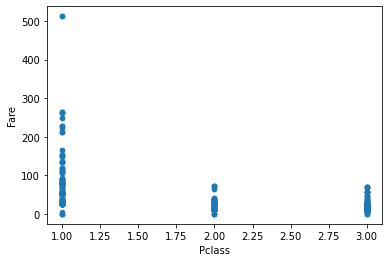

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("titanic_dataset.csv")

df.plot(kind = 'scatter', x = 'Pclass', y = 'Fare')

plt.show()



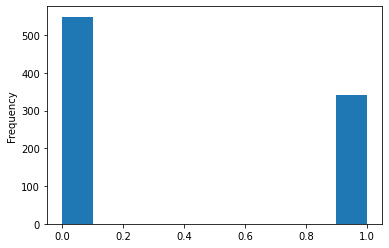

In [31]:
df["Survived"].plot(kind = 'hist')

plt.show()

In [52]:
grouped_sumasex = df.groupby('Sex').sum()
grouped_sumasex

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,135343,233,678,7286.00,218,204,13966.6628
male,262043,109,1379,13919.17,248,136,14727.2865


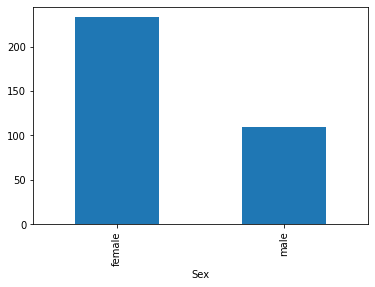

In [53]:
grouped_sumasex['Survived'].plot(kind = 'bar')
plt.show()

In [62]:
df['AgeGroup']=pd.cut(df.Age,5,labels=['adolescente','juventud','de edad mediana','de mediana edad y ancianos','anciano'])
df.groupby('AgeGroup').Sex.count()

AgeGroup
adolescente                   100
juventud                      346
de edad mediana               188
de mediana edad y ancianos     69
anciano                        11
Name: Sex, dtype: int64

In [71]:
age_percentage=df.groupby('Age').Survived.mean()
age_percentage

Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64

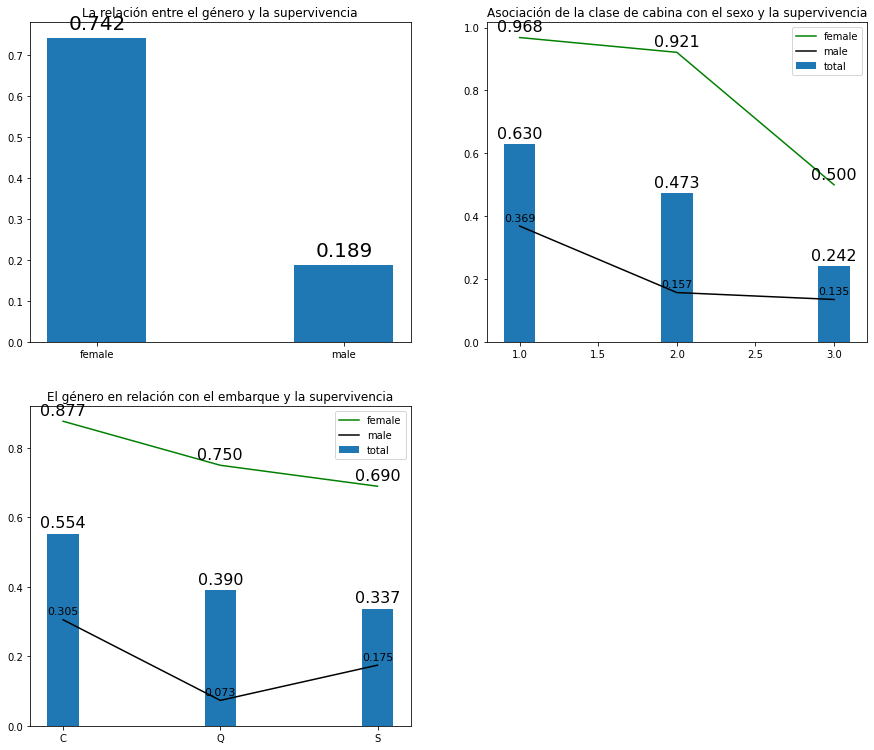

In [78]:
survived_percentage=df[['Pclass','Survived']].groupby('Pclass').Survived.mean().sort_values(ascending=False)
#定义总表的大小，先横的长度，再竖的长度
plt.figure(figsize=(15,20))
#子图1
plt.subplot(3, 2, 1)
sex_percentage=df.groupby('Sex').Survived.mean()
y=np.array(sex_percentage)
plt.bar(sex_percentage.index,y,width=0.4)
plt.title('La relación entre el género y la supervivencia')
#去掉网格线
plt.grid(False)
#添加数据标签
for a,b in zip(sex_percentage.index,y):
#设置小数点后三位数的地方是'%.3f'%b
    plt.text(a, b+0.01, '%.3f'%b, ha='center', va='bottom', fontsize=20)
#子图2
plt.subplot(3, 2, 2)
PA_persentage=df.groupby(['Sex','Pclass']).Survived.mean().reset_index()
y1=PA_persentage[PA_persentage['Sex']=='male'].Survived
y2=PA_persentage[PA_persentage['Sex']=='female'].Survived
plt.bar([1,2,3],survived_percentage,width=0.2)
plt.plot([1,2,3],y2,color='g')
plt.plot([1,2,3],y1,color='k')
for a,b in zip([1,2,3],survived_percentage):
    plt.text(a, b+0.01, '%.3f'%b, ha='center', va='bottom', fontsize=16)
for a,b in zip([1,2,3],y2):
    plt.text(a, b+0.01, '%.3f'%b, ha='center', va='bottom', fontsize=16)
for a,b in zip([1,2,3],y1):
    plt.text(a, b+0.01, '%.3f'%b, ha='center', va='bottom', fontsize=11) 
plt.title('Asociación de la clase de cabina con el sexo y la supervivencia')
plt.grid(False)
#添加图例
plt.legend(['female','male','total']) 

plt.subplot(3, 2, 3)
# SA_persentage=df.groupby(['Sex','AgeGroup']).Survived.mean().reset_index()

# x1=['adolescente','juventud','de edad mediana','de mediana edad y ancianos','anciano']
# x2=['adolescente','juventud','de edad mediana','de mediana edad y ancianos']
# y1=SA_persentage[SA_persentage['Sex']=='male'].Survived
# y2=SA_persentage[SA_persentage['Sex']=='female'].Survived


# age_percentage=df.groupby('Age').Survived.mean()

# plt.bar(x1,age_percentage,width=0.2)
# plt.plot(x2,y2,color='g')
# plt.plot(x1,y1,color='k')
# plt.legend(['female','male','total']) 
# for a,b in zip(x1,age_percentage):
#     plt.text(a, b+0.01, '%.3f'%b, ha='center', va='bottom', fontsize=16)
# for a,b in zip(x2,y2):
#     plt.text(a, b+0.01, '%.3f'%b, ha='center', va='bottom', fontsize=16)
# for a,b in zip(x1,y1):
#     plt.text(a, b+0.01, '%.3f'%b, ha='center', va='bottom', fontsize=11) 
# plt.grid(False)
# plt.title('La relación entre el sexo y la edad y la supervivencia')

# plt.subplot(3, 2, 4)
Ps_persentage=df.groupby(['Embarked','Sex']).Survived.mean().reset_index()
x=Ps_persentage['Embarked'].value_counts().index.sort_values()
y1=Ps_persentage[Ps_persentage['Sex']=='male'].Survived
y2=Ps_persentage[Ps_persentage['Sex']=='female'].Survived
y3=df.groupby('Embarked').Survived.mean()
plt.bar(x,y3,width=0.2)
plt.plot(x,y2,color='g')
plt.plot(x,y1,color='k')
for a,b in zip(x,y3):
    plt.text(a, b+0.01, '%.3f'%b, ha='center', va='bottom', fontsize=16)
for a,b in zip(x,y2):
    plt.text(a, b+0.01, '%.3f'%b, ha='center', va='bottom', fontsize=16)
for a,b in zip(x,y1):
    plt.text(a, b+0.01, '%.3f'%b, ha='center', va='bottom', fontsize=11) 
plt.legend(['female','male','total']) 
plt.grid(False)
plt.title('El género en relación con el embarque y la supervivencia')

plt.show()